**PHASE 1: SETUP & DATA LOADING**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/admission_data.csv")
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**PHASE 2: DATA CLEANING**

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [25]:
df.rename(columns={
    'Serial No.': 'ID',
    'GRE Score': 'GRE',
    'TOEFL Score': 'TOEFL',
    'University Rating': 'Univ_Rating',
    'SOP': 'SOP',
    'LOR ': 'LOR',
    'CGPA': 'CGPA',
    'Research': 'Research',
    'Chance of Admit ': 'Chance_Admit'
}, inplace=True)


In [26]:
print(df.columns)


Index(['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Chance_Admit'],
      dtype='object')


In [5]:
df.isnull().sum()

,0
GRE,0
TOEFL,0
Univ_Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance_Admit,0


**PHASE 3: EXPLORATORY DATA ANALYSIS (EDA)**

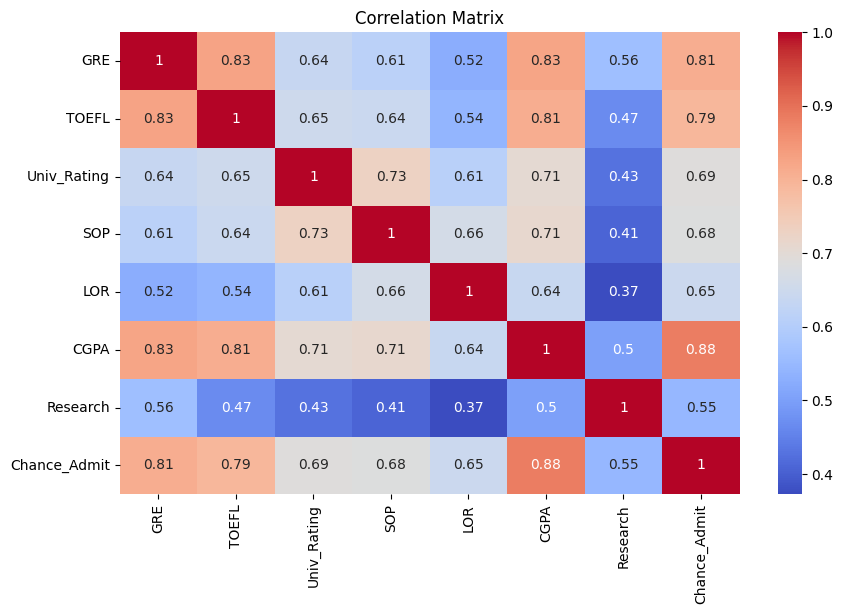

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Key Visuals**

**1. GRE vs Chance of Admit**

<Axes: xlabel='GRE', ylabel='Chance_Admit'>

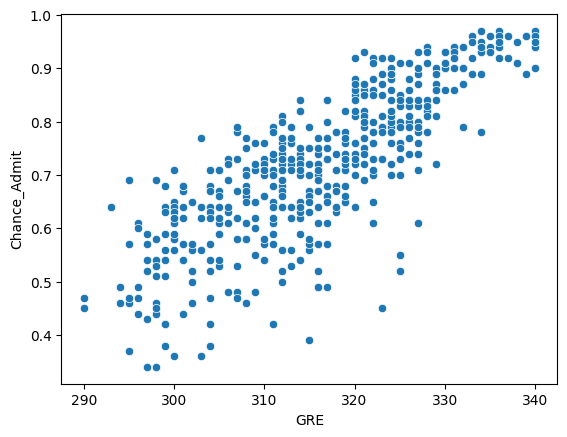

In [7]:
sns.scatterplot(x='GRE', y='Chance_Admit', data=df)

**2. Research vs Admission Chance**

<Axes: xlabel='Research', ylabel='Chance_Admit'>

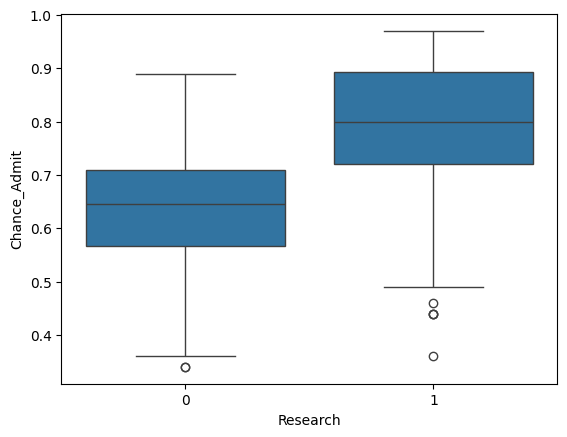

In [8]:
sns.boxplot(x='Research', y='Chance_Admit', data=df)

**3. University Rating vs Admission Chance**

<Axes: xlabel='Univ_Rating', ylabel='Chance_Admit'>

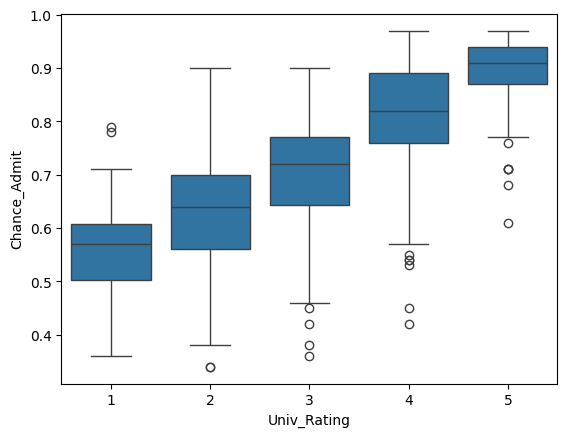

In [9]:
sns.boxplot(x='Univ_Rating', y='Chance_Admit', data=df)

**4. CGPA Distribution**

<Axes: xlabel='CGPA', ylabel='Count'>

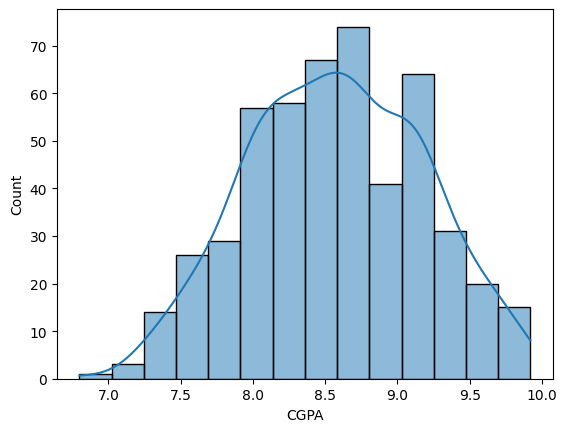

In [10]:
sns.histplot(df['CGPA'], kde=True)

**PHASE 4: PREDICTION MODEL**

**Linear Regression Model**

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ✅ Drop only the target variable from features
X = df.drop(['Chance_Admit'], axis=1)
y = df['Chance_Admit']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.8188432567829631
MSE: 0.003704655398788405


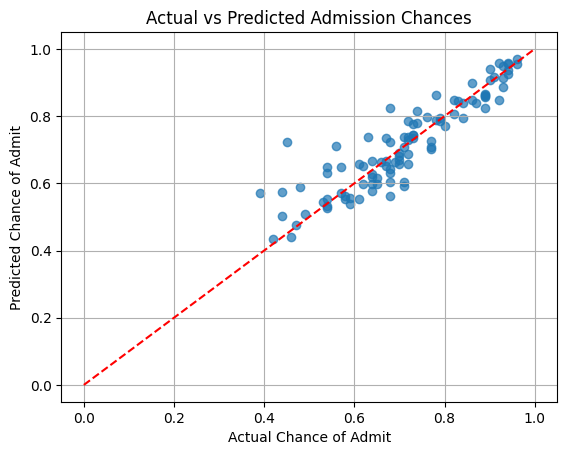

In [28]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Actual vs Predicted Admission Chances")
plt.plot([0, 1], [0, 1], 'r--')  # Line of perfect prediction
plt.grid(True)
plt.show()


In [29]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)


       Feature  Coefficient
5         CGPA     0.112527
6     Research     0.024027
4          LOR     0.017238
1        TOEFL     0.002996
2  Univ_Rating     0.002569
0          GRE     0.002434
3          SOP     0.001814
